In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
R = 0.005
Br = 1.1
L = 0.08
mu0 = 4* np.pi * 1e-7

In [3]:
def torque(z1, z2, alphap, betap, z0p):

    d = (z2 - z1)
    z0 = (z0p - z2)
    
    alpha = alphap
    beta = betap
    
    pref = L * Br**2 * np.pi * R**4 / 2 / mu0 / np.abs(d)**6
    
    return pref * (2 * np.imag(d**3 * np.conjugate(z0) * np.exp(- 1j*(alpha + beta)))
                     + np.imag(d**3 * np.conjugate(d ) * np.exp(- 1j*(alpha + beta))))

In [4]:
torque(0.03, 0, 0,np.pi/2,0)

-0.084027777777777798

<IPython.core.display.Javascript object>


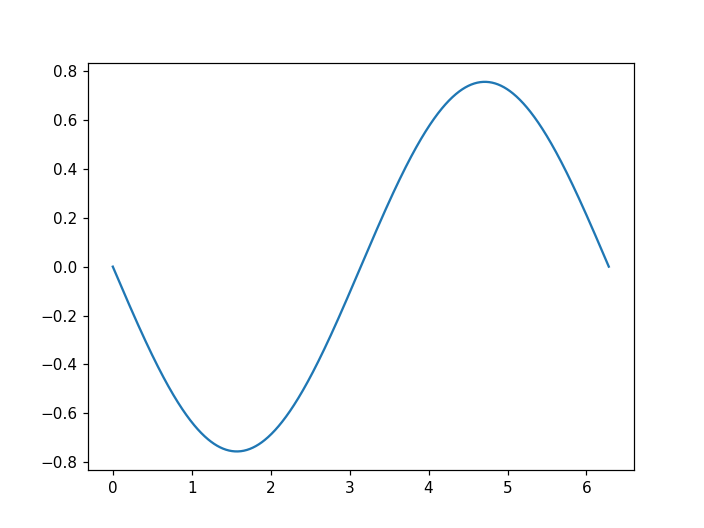

In [5]:
phis = np.linspace(0,2*np.pi,1000)

plt.figure('torque 2 rods')
plt.plot(phis,torque(0.01, 0, 0,phis,0))


In [6]:
def array_torque(delta_phi, rand_alphas = 0, rand_betas = 0):
    phis = np.linspace(0, 2*np.pi, 17)[:-1]

    r1 = 0.05
    r2 = 0.066

    z1s = r1 * np.exp(1j * phis)
    z2s = r2 * np.exp(1j * (phis + delta_phi))

    alphas = 3 * phis + rand_alphas
    betas = 3 * phis + delta_phi + rand_betas


    torque_ges = 0
    for i in range(len(phis)):
        for j in range(len(phis)):
            torque_ges += torque(z1s[i], z2s[j], alphas[i], betas[j],0)
    
    return torque_ges

In [7]:
delta_phis = np.linspace(0., 2 * np.pi,1000)

rand_alphas =10*2.*np.pi/360*np.random.rand(16)
rand_betas =10*2.*np.pi/360*np.random.rand(16)

In [12]:
plt.figure('torque ring')

torque_phis = [array_torque(delta_phi, rand_alphas, rand_betas) for delta_phi in delta_phis] 

plt.plot(delta_phis/np.pi,torque_phis )

ax = plt.gca()
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
ax.xaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(MultipleLocator(base=1.0))

plt.ylabel('Torque [Nm]')

<IPython.core.display.Javascript object>